# Day 09. Exercise 02
# Metrics

## 0. Imports

In [119]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay


## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [120]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
df['dayofweek'] = np.random.choice(np.arange(7), size=1686, replace=True)
df

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1682,6,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
1683,7,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1684,8,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [121]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [122]:
svc = SVC(random_state=21, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=21)

In [123]:
y_pred = svc.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test, y_pred):.5f}')
print(f'Precision is {precision_score(y_test, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

y_score = svc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

Accuracy is 0.16568
Precision is 0.06853
recall is 0.16568
roc_auc is 0.48954


/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3. Decision tree

1. The same task for decision tree

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14}

In [124]:
model_tree = DecisionTreeClassifier(max_depth=14, class_weight='balanced', criterion='gini')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=14)

In [125]:
y_pred = model_tree.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test, y_pred):.5f}')
print(f'Precision is {precision_score(y_test, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

y_score = svc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

Accuracy is 0.11834
Precision is 0.11890
recall is 0.11834
roc_auc is 0.48954


## 4. Random forest

1. The same task for random forest.

Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 5}
Лучшая точность: 0.1654275092936803


In [126]:
model_forest = RandomForestClassifier(max_depth=6, n_estimators=5, class_weight='balanced', criterion='gini')
model_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=5)

In [127]:
y_pred = model_forest.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test, y_pred):.5f}')
print(f'Precision is {precision_score(y_test, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

y_score = svc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

Accuracy is 0.12722
Precision is 0.10958
recall is 0.12722
roc_auc is 0.48954


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

В нашем случае (не очень корректные данные) тяжело выделить лучшую модель (они все не очень...). Поэтому в данном случае выбираю модель RandomForestClassifier 

In [128]:
model_forest = RandomForestClassifier(max_depth=6, n_estimators=5, class_weight='balanced', criterion='gini')
model_forest.fit(X_train, y_train)
joblib.dump(model_forest, 'model.pkl')

['model.pkl']

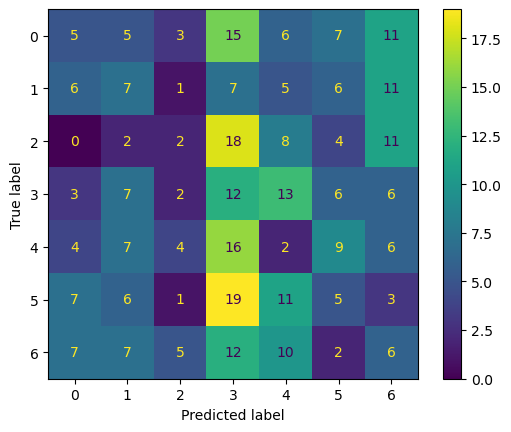

In [129]:
ConfusionMatrixDisplay.from_estimator(model_forest, X_test, y_test)

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [135]:
def calc_metrics(models, X, y):
    data = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
    d = {}
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_score = model.predict_proba(X_test)
        d = {'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
             'reccall': recall_score(y_test, y_pred, average='weighted'),
             'roc_auc': roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')}
        data.append(d)
    return data

In [134]:
models = [svc, model_tree, model_forest]
calc_metrics(models, X, y)

SVC(probability=True, random_state=21):
DecisionTreeClassifier(class_weight='balanced', max_depth=14):
RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=5):


/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[{'accuracy': 0.16568047337278108,
  'precision': 0.06852667335396163,
  'reccall': 0.16568047337278108,
  'roc_auc': 0.48953786985108855},
 {'accuracy': 0.10946745562130178,
  'precision': 0.11174553722630647,
  'reccall': 0.10946745562130178,
  'roc_auc': 0.48364013124765},
 {'accuracy': 0.11242603550295859,
  'precision': 0.11614948189405076,
  'reccall': 0.11242603550295859,
  'roc_auc': 0.4880613006713566}]